## Project 3 - Group 7
#### Barbara MacGregor, Matt Russell, Amanda Enstad and Chi Tran

### Load Data

In [19]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
##import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
trainCsv = 'loanDataTrain.csv'
valCsv = 'loanDataValidate.csv'

In [21]:
trainDf = pd.read_csv(trainCsv)
trainDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
valDf = pd.read_csv(valCsv)
valDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Inspect Data
* There are nulls values in various columns
* No nonsensical data point (i.e: loan amount of 0, applicant income of 0,..)
* If we drop all data with null value, our train and validation dataset will reduce by ~22%

In [23]:
# print out all of unique values in each columns in train dataframe
# visually inspect to identify any NA or inconsistencies

colNames = list(trainDf.columns)
for col in colNames:
    print(col)
    print(trainDf[col].unique())
    print('Number of element of Unique Values: ')
    print(len(trainDf[col].unique()))
    print('-----------')

Loan_ID
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

In [24]:
# print out all of unique values in each columns in validation dataframe
# visually inspect to identify any NA or inconsistencies

colNames = list(valDf.columns)
for col in colNames:
    print(col)
    print(valDf[col].unique())
    print('Number of element of Unique Values: ')
    print(len(valDf[col].unique()))
    print('-----------')

Loan_ID
['LP001015' 'LP001022' 'LP001031' 'LP001035' 'LP001051' 'LP001054'
 'LP001055' 'LP001056' 'LP001059' 'LP001067' 'LP001078' 'LP001082'
 'LP001083' 'LP001094' 'LP001096' 'LP001099' 'LP001105' 'LP001107'
 'LP001108' 'LP001115' 'LP001121' 'LP001124' 'LP001128' 'LP001135'
 'LP001149' 'LP001153' 'LP001163' 'LP001169' 'LP001174' 'LP001176'
 'LP001177' 'LP001183' 'LP001185' 'LP001187' 'LP001190' 'LP001203'
 'LP001208' 'LP001210' 'LP001211' 'LP001219' 'LP001220' 'LP001221'
 'LP001226' 'LP001230' 'LP001231' 'LP001232' 'LP001237' 'LP001242'
 'LP001268' 'LP001270' 'LP001284' 'LP001287' 'LP001291' 'LP001298'
 'LP001312' 'LP001313' 'LP001317' 'LP001321' 'LP001323' 'LP001324'
 'LP001332' 'LP001335' 'LP001338' 'LP001347' 'LP001348' 'LP001351'
 'LP001352' 'LP001358' 'LP001359' 'LP001361' 'LP001366' 'LP001368'
 'LP001375' 'LP001380' 'LP001386' 'LP001400' 'LP001407' 'LP001413'
 'LP001415' 'LP001419' 'LP001420' 'LP001428' 'LP001445' 'LP001446'
 'LP001450' 'LP001452' 'LP001455' 'LP001466' 'LP001471

In [25]:
# if drop all null values
# our train data reduces from 614 entries to 480 entries
# lose ~22% of our data
noNullTrainDf = trainDf.dropna()
len(noNullTrainDf)

480

In [26]:
# if drop all null values
# our validation data reduces from 367 entries to 289 entries
# lose ~21% of our data
noNullValDf = valDf.dropna()
len(noNullValDf)

289

### Transform: Fill in Null Values, Format
* For column we could fill in null with confidence:
  - Dependence:"NaN" , fill with "0"
  - Self-employed: "NaN" fill with "No"
  - Credit history: "NaN" fill with "0"

* For columns such as gender, loan amount: we can't fill in null values with confidence:
  - These nulls will be dropped from the dataset
  
* Numeric data consistency:
  - ApplicantIncome: float
  - CoapplicantIncome: float
  - LoanAmount: float, also convert to dollars instead of thousands

In [27]:
# list columns that have null values in training table
trainDf.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
# Fill NA for these 3 columns
# Dependence:"NaN" most likely mean "0"
# Self-employed: "NaN" most likely mean "No"
# Credit history: "NaN" most likely mean "0"
trainDf["Dependents"] = trainDf["Dependents"].fillna("0")
trainDf["Self_Employed"] = trainDf["Self_Employed"].fillna("No")
trainDf["Credit_History"] = trainDf["Credit_History"].fillna(0)


In [29]:
# our train data reduces from 614 entries to 563 entries
# lose only ~8% of our data# 
noNullTrainDf = trainDf.dropna()
len(noNullTrainDf)

563

In [30]:
# list columns that have null values in validation table
valDf.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
# Fill NA for these 3 columns
# Dependence:"NaN" most likely mean "0"
# Self-employed: "NaN" most likely mean "No"
# Credit history: "NaN" most likely mean "0"
valDf["Dependents"] = valDf["Dependents"].fillna("0")
valDf["Self_Employed"] = valDf["Self_Employed"].fillna("No")
valDf["Credit_History"] = valDf["Credit_History"].fillna(0)


In [32]:
# our validation data reduces from 367 entries to 345 entries
# lose ~6% of our data
noNullValDf = valDf.dropna()
len(noNullValDf)

345

In [33]:
# Numeric data consistency
noNullTrainDf["LoanAmount"] = noNullTrainDf["LoanAmount"]*1000;
noNullTrainDf['ApplicantIncome'] = noNullTrainDf['ApplicantIncome'].astype(float)

noNullTrainDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141000.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267000.0,360.0,1.0,Urban,Y


In [34]:
# Numeric data consistency 
noNullValDf["LoanAmount"] = noNullValDf["LoanAmount"]*1000;
noNullValDf['CoapplicantIncome'] = noNullValDf['CoapplicantIncome'].astype(float)
noNullValDf['ApplicantIncome'] = noNullValDf['ApplicantIncome'].astype(float)

noNullValDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0.0,110000.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500.0,126000.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800.0,208000.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546.0,100000.0,360.0,0.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0.0,78000.0,360.0,1.0,Urban


### Data Visualization
* Create data visualization to display on website
  - TBD

In [35]:
# Create a copy to generate plot
trainDataCopy =  noNullTrainDf.copy()

# Bin the incomes into different tax bracket
# 10% at up to 9,875
# 12% at $9,876 to $40,125
# 22% at $40,126 to $85,525
# 24% at $85,526 to $163,300
# 32% at $163,301 to $207,350

incomeBins=[-1,9876,40126,85525,163300,207350]
incomeBinLabels=["<$\$$9,876","$\$$9,876-$\$$40,125","$\$$40,126-$\$$85,525",\
                "$\$$85,525-$\$$163,300","$\$$163,300-$\$$207,350"]

trainDataCopy["ApplicantIncome_Bin"]=pd.cut(trainDataCopy["ApplicantIncome"],incomeBins,labels=incomeBinLabels)
trainDataCopy["CoapplicantIncome_Bin"]=pd.cut(trainDataCopy["CoapplicantIncome"],incomeBins,labels=incomeBinLabels)


# Bin Loan
loanBins=[-1,100000,200000,400000,800000]
loanBinLabels=["<$\$$100k","$\$$100k-$\$$200k","$\$$200k-$\$$400k","$\$$400k-$\$$800k"]
trainDataCopy["LoanAmount_Bin"]=pd.cut(trainDataCopy["LoanAmount"],loanBins,labels=loanBinLabels)

# Create a combine income
trainDataCopy["TotalIncome"] = trainDataCopy["ApplicantIncome"] + trainDataCopy["CoapplicantIncome"]
trainDataCopy["TotalIncome_Bin"]=pd.cut(trainDataCopy["TotalIncome"],incomeBins,labels=incomeBinLabels)


trainDataCopy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Bin,CoapplicantIncome_Bin,LoanAmount_Bin,TotalIncome,TotalIncome_Bin
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128000.0,360.0,1.0,Rural,N,"<$\$$9,876","<$\$$9,876",$\$$100k-$\$$200k,6091.0,"<$\$$9,876"
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000.0,360.0,1.0,Urban,Y,"<$\$$9,876","<$\$$9,876",<$\$$100k,3000.0,"<$\$$9,876"
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000.0,360.0,1.0,Urban,Y,"<$\$$9,876","<$\$$9,876",$\$$100k-$\$$200k,4941.0,"<$\$$9,876"
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141000.0,360.0,1.0,Urban,Y,"<$\$$9,876","<$\$$9,876",$\$$100k-$\$$200k,6000.0,"<$\$$9,876"
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267000.0,360.0,1.0,Urban,Y,"<$\$$9,876","<$\$$9,876",$\$$200k-$\$$400k,9613.0,"<$\$$9,876"


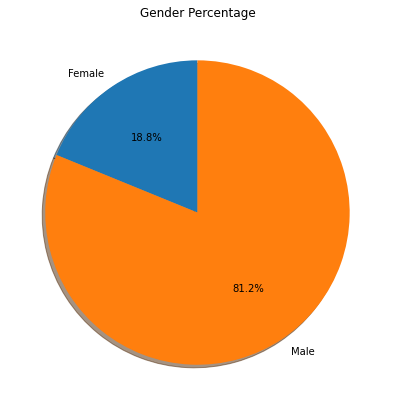

<Figure size 1080x576 with 0 Axes>

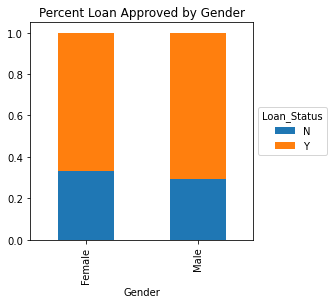

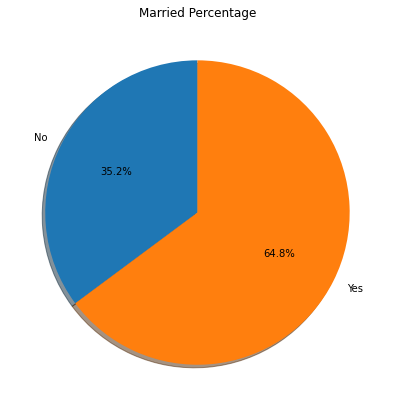

<Figure size 1080x576 with 0 Axes>

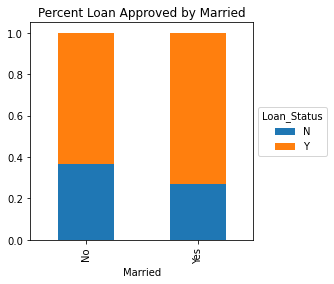

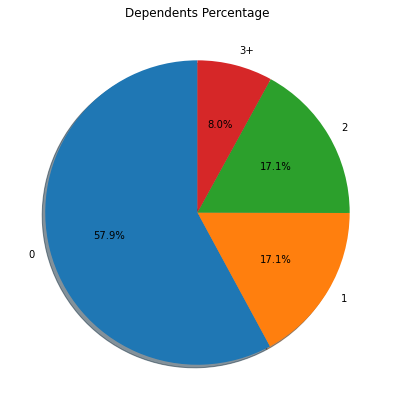

<Figure size 1080x576 with 0 Axes>

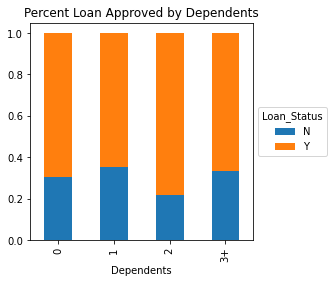

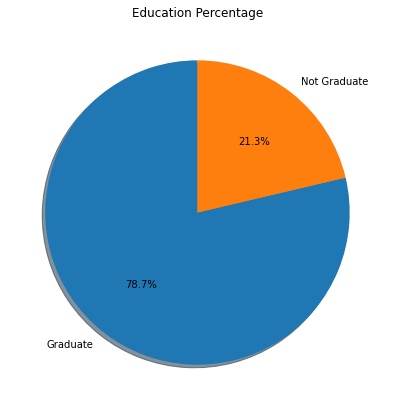

<Figure size 1080x576 with 0 Axes>

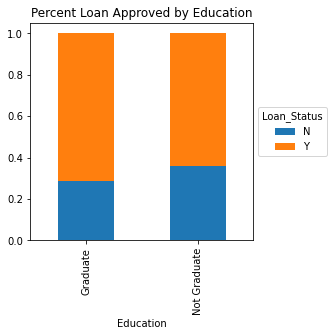

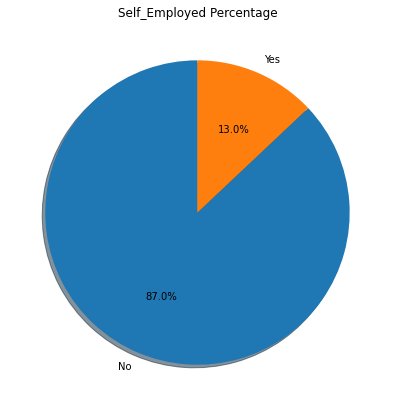

<Figure size 1080x576 with 0 Axes>

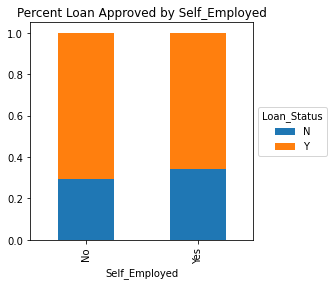

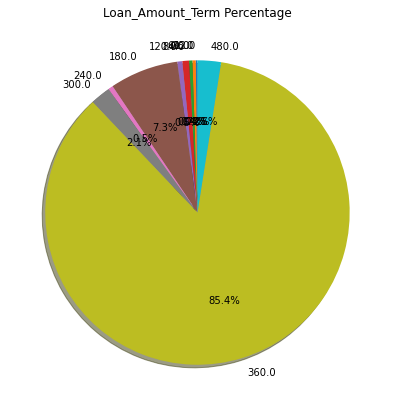

<Figure size 1080x576 with 0 Axes>

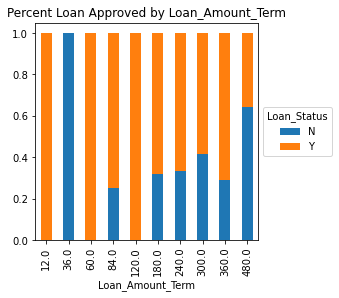

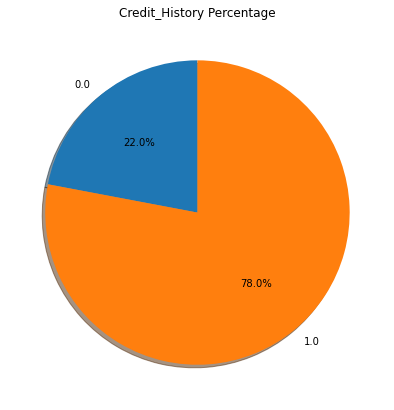

<Figure size 1080x576 with 0 Axes>

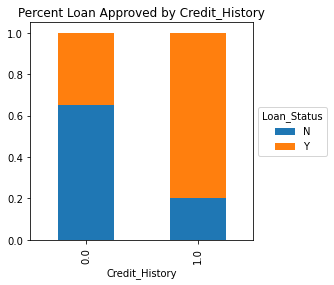

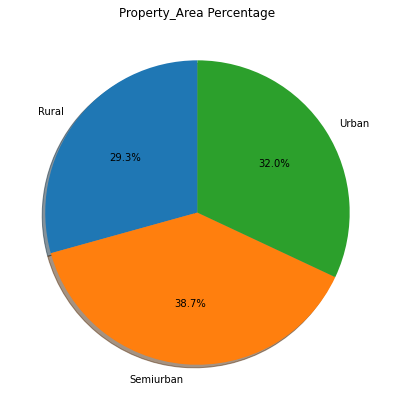

<Figure size 1080x576 with 0 Axes>

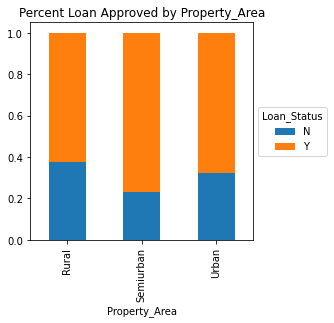

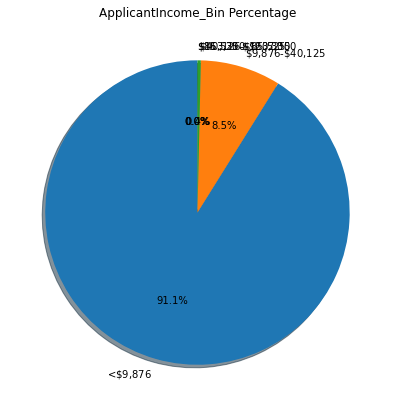

<Figure size 1080x576 with 0 Axes>

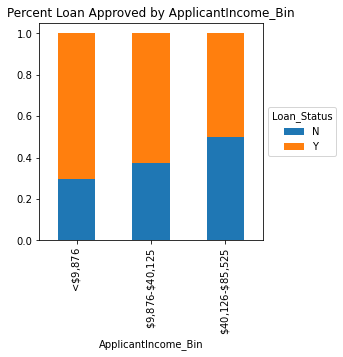

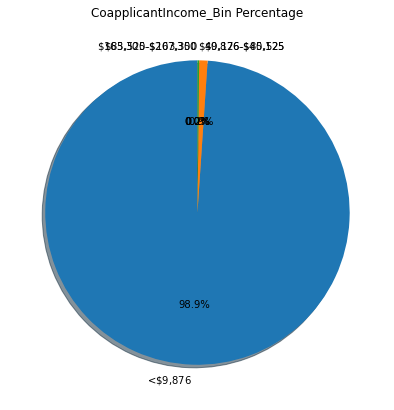

<Figure size 1080x576 with 0 Axes>

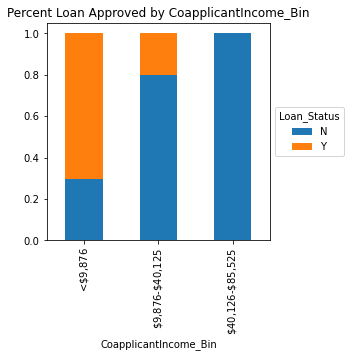

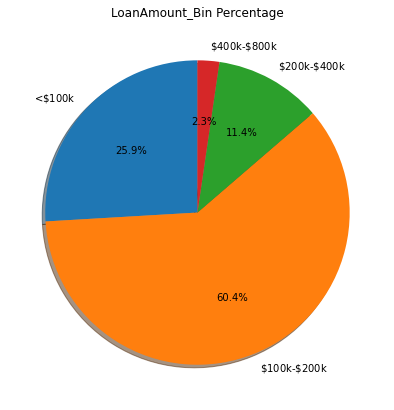

<Figure size 1080x576 with 0 Axes>

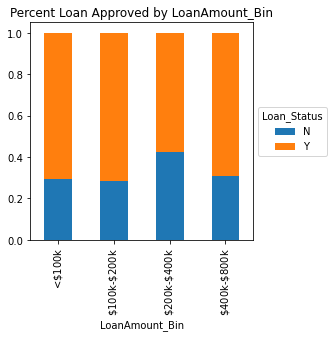

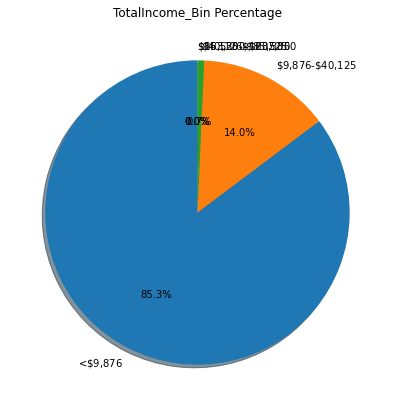

<Figure size 1080x576 with 0 Axes>

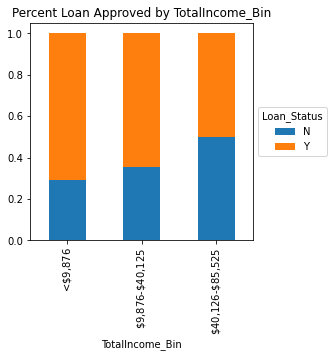

In [43]:
# Visualization 
colList = ['Gender', 'Married', 'Dependents', 'Education',\
           'Self_Employed','Loan_Amount_Term', 'Credit_History','Property_Area',\
           "ApplicantIncome_Bin", "CoapplicantIncome_Bin", "LoanAmount_Bin","TotalIncome_Bin"]

for col in colList: 

#   Calculate stats for pie chart
    pieStats = trainDataCopy[[col,"Loan_ID"]].groupby([col])\
                            .agg(totalCount= ('Loan_ID','count')).reset_index()
    pieStats["totalRecords"] = len(trainDataCopy)
    pieStats["Percent_Group_Count"] = pieStats["totalCount"]/pieStats["totalRecords"]*100
   

#   Calculate stats for stacked bar chart
    barStats= pd.crosstab(trainDataCopy[col], trainDataCopy["Loan_Status"])
    barStats = barStats.div(barStats.sum(1).astype(float), axis=0)
    

#   Plot pie chart
    fig1 = plt.figure(figsize=(12,7))
    ##sns.set(font_scale=1.5)
    plt.pie(pieStats["Percent_Group_Count"], labels=pieStats[col], autopct='%1.1f%%',shadow=True, startangle=90)
    plt.title(col + ' Percentage')
    plt.savefig(col+ '_pieStats.png', dpi=300, bbox_inches='tight')

#   Plot normalize stacked bar chart
    fig2 = plt.figure(figsize=(15,8))
    ##sns.set(font_scale=1.5)
    barStats.plot(kind="bar",stacked=True,figsize=(4,4))
    plt.legend(title='Loan_Status',loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title('Percent Loan Approved by '+col)
    plt.savefig(col+ '_barStats.png', dpi=300, bbox_inches='tight')

In [ ]:
# Different visualization
colList = ['Gender', 'Married', 'Dependents', 'Education',\
           'Self_Employed','Loan_Amount_Term', 'Credit_History','Property_Area',\
           "ApplicantIncome_Bin", "CoapplicantIncome_Bin", "LoanAmount_Bin","TotalIncome_Bin"]

for col in colList: 
    pieStats = trainDataCopy[[col,"Loan_ID"]].groupby([col])\
                            .agg(totalCount= ('Loan_ID','count')).reset_index()
    pieStats["totalRecords"] = len(trainDataCopy)
    pieStats["Percent_Group_Count"] = pieStats["totalCount"]/pieStats["totalRecords"]*100
    
    plt.savefig("pieStats.png", bbox_inches='tight', dpi=600)
    
    barStats = trainDataCopy[[col,"Loan_ID","Loan_Status"]].groupby([col,"Loan_Status"])\
                            .agg(groupCount= ('Loan_ID','count')).reset_index()
    barStats = barStats.merge(pieStats,on = col)
    barStats["Loan_Status_Percentage"] = barStats["groupCount"]/barStats["totalCount"]*100
    
    fig1 = plt.figure(figsize=(12,7))
    sns.set(font_scale=1.5)
    plt.pie(pieStats["Percent_Group_Count"], labels=pieStats[col], autopct='%1.1f%%',shadow=True, startangle=90)
    plt.title(col + ' Percentage')
    
    fig2 = plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    fig2 = sns.catplot(x = col,       # x variable name
                    y = "Loan_Status_Percentage",       # y variable name
                    data =barStats,     # dataframe to plot
                    kind = "bar",
                    hue = "Loan_Status",
                    height=5,    
                    aspect=2) 
    plt.title('Percent Loan Approved by '+col)

### Transform: Enconding
* Encoding non-numeric data:
  - Gender: 
      - "Female" : 1
      - "Male"   : 0
  - Married: 
      - "Yes" : 1 
      - "No"  : 0
  - Dependents: 
      - "0"  : 0
      - "1"  : 1
      - "2"  : 2
      - "3+" : 3
  - Property_Area:
      - "Rural"     : 0
      - "Semiurban" : 1
      - "Urban:     : 2
  - Education:
      - "Not Graduate"  : 0
      - "Graduate"      : 1
  - Self_Employed:
      - "Yes" : 1
      - "No"  : 0
   - Loan_Status:
     - "Y" : 1
     - "N" : 0
* Combine income and co-income into totalIncome
* Remove LoanID, ApplicantIncome, and CoapplicantIncome columns

In [ ]:
# Data encoding map
encodingMap = {"Female": 1, "Male": 0,\
               "Yes" : 1, "No": 0,\
               "Y" : 1, "N": 0,\
               "Rural": 0, "Semiurban": 1, "Urban": 2,\
               "Not Graduate": 0, "Graduate": 1,\
               "0": 0, "1": 1, "2": 2, "3+": 3}

In [ ]:
# Apply encoding
noNullTrainDf = noNullTrainDf.applymap(lambda x: encodingMap.get(x) if x in encodingMap else x)
noNullTrainDf["Credit_History"] = noNullTrainDf["Credit_History"].astype(int)

noNullValDf = noNullValDf.applymap(lambda x: encodingMap.get(x) if x in encodingMap else x)
noNullValDf["Credit_History"] = noNullValDf["Credit_History"].astype(int)

In [ ]:
# Combine incomes
noNullTrainDf["TotalIncome"] = noNullTrainDf["ApplicantIncome"] + noNullTrainDf["CoapplicantIncome"]
noNullValDf["TotalIncome"] = noNullValDf["ApplicantIncome"] + noNullValDf["CoapplicantIncome"]

In [ ]:
# remove Loan_ID column
noNullTrainDf = noNullTrainDf.drop(columns=["Loan_ID","ApplicantIncome","CoapplicantIncome"])
noNullValDf = noNullValDf.drop(columns=["Loan_ID","ApplicantIncome","CoapplicantIncome"])

In [ ]:
noNullTrainDf.dtypes

In [ ]:
noNullValDf.dtypes

### Load
* Save two cleaned and transformed dataframes: 2 .csv inthe "data" folder
  - cleanLoanDatavalidation.csv
  - cleanLoanDataTrain.csv
* If needed, this section could be modify to load two tables into 2 sqlite database

In [ ]:
noNullTrainDf.to_csv('cleanLoanDataTrain.csv', index=False)
noNullValDf.to_csv('cleanLoanDataValidation.csv', index=False)